<a href="https://colab.research.google.com/github/thisisphume/ETF_Analysis_Testing/blob/main/yfinance_starting_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [1]:
!pip install yfinance==0.1.52

  Created wheel for yfinance: filename=yfinance-0.1.52-py2.py3-none-any.whl size=21996 sha256=f4aa68e3f2a3a9143d612a8b83ba69f5c5d3f7414d42e96154be96b81c572ec6
  Stored in directory: /root/.cache/pip/wheels/1b/9d/ce/929e851fc7d649cd962c177220ad985675785aa97c54df5714
Successfully built yfinance


***

# Yahoo Finance (yfinance)
- No Bond and commodities data
- No high freq data
- No Bid/Ask

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
ticker = ["GE", "AAPL","FB"]

In [8]:
stock_price = yf.download( ticker, start="2020-01-05", end="2020-01-27"
                      , period="1d" #1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                      , interval ="1h" # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                      )
stock_price.head(5)

[*********************100%***********************]  3 of 3 completed


Adj Close                       ...   Volume                   
                  AAPL          FB       GE  ...     AAPL       FB        GE
Date                                         ...                            
2020-01-06  297.539001  210.339996  12.1250  ...  9414148  4113389  25472111
2020-01-06  299.209991  210.470001  12.1238  ...  4789788  1810758  10745643
2020-01-06  297.869995  210.740005  12.0745  ...  3397100  2101788  10404049
2020-01-06  298.750000  211.139999  12.0750  ...  2042135  1358030   7085691
2020-01-06  299.386200  211.406494  12.0150  ...  2651051  1288072  12896933

[5 rows x 18 columns]

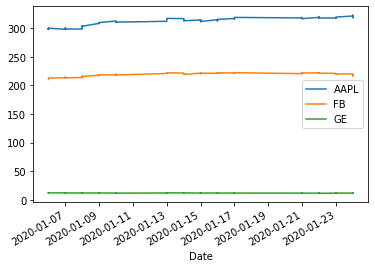

In [9]:
stock_price['Adj Close'].plot()

In [5]:
stock_price = yf.download( ticker, start="2020-01-05", end="2020-01-27", group_by="Ticker")
stock_price.head(5)

[*********************100%***********************]  3 of 3 completed


AAPL                        ...          FB                      
                 Open       High        Low  ...       Close   Adj Close    Volume
Date                                         ...                                  
2020-01-06  73.447502  74.989998  73.187500  ...  212.600006  212.600006  17058900
2020-01-07  74.959999  75.224998  74.370003  ...  213.059998  213.059998  14912400
2020-01-08  74.290001  76.110001  74.290001  ...  215.220001  215.220001  13475000
2020-01-09  76.809998  77.607498  76.550003  ...  218.300003  218.300003  12642800
2020-01-10  77.650002  78.167503  77.062500  ...  218.059998  218.059998  12119400

[5 rows x 18 columns]

## Index Data
- Use the total return data (including the dividend)

In [52]:
ticker = ["^DJI","^GSPC", "^DJITR", "^SP500TR"] # 
stock_price = yf.download( ticker, period="5y" #1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                      , interval ="1d" # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                      )['Adj Close']
stock_price.head(5)

[*********************100%***********************]  4 of 4 completed


,^DJI,^DJITR,^GSPC,^SP500TR
Date,,,,
2016-01-28,16069.639648,NaN,1893.359985,3544.129883
2016-01-29,16466.300781,NaN,1940.239990,3631.959961
2016-02-01,16449.179688,NaN,1939.380005,3630.459961
2016-02-02,16153.540039,NaN,1903.030029,3562.520020
2016-02-03,16336.660156,NaN,1912.530029,3581.530029


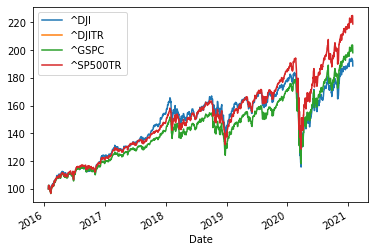

In [53]:
stock_price.div(stock_price.iloc[0]).mul(100).plot()

## Currencies/FX
- No volumne data

[*********************100%***********************]  2 of 2 completed


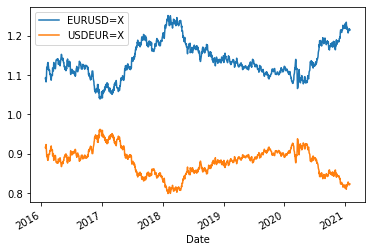

In [10]:
ticker = "EURUSD=X"  # 1 Euro we get X USD
ticker2 = "USDEUR=X" # 1 USD we get X Euro
ticker3 = "USDGBP=X" # 1 USD we get X GBP
yf.download( [ticker, ticker2], period="5y")['Adj Close'].plot()

In [11]:
yf.download( ticker3, period="5y").head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-28,0.70190,0.7022,0.6942,0.70180,0.70180,0
2016-01-29,0.69638,0.7047,0.6937,0.69628,0.69628,0
2016-02-01,0.70201,0.7023,0.6955,0.70195,0.70195,0
2016-02-02,0.69320,0.6977,0.6922,0.69310,0.69310,0
2016-02-03,0.69403,0.6951,0.6853,0.69400,0.69400,0


## Cryptocurrencies

[*********************100%***********************]  3 of 3 completed


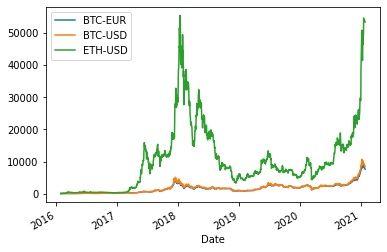

In [12]:
ticker = ['BTC-USD','BTC-EUR','ETH-USD']
cryp = yf.download( ticker, period="5y")['Adj Close']
cryp.div(cryp.iloc[0]).mul(100).plot()

# Mutual Funds & ETFs



In [13]:
tickers = ['TLT' # isahres 20+ year (US) treasury bond ETF 
, 'OMOIX' # vivaldi multi-strategy mutual fund class I
]

[*********************100%***********************]  2 of 2 completed


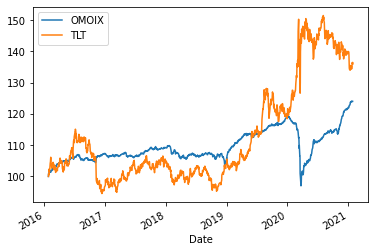

In [14]:
mf = yf.download( tickers, period="5y")['Adj Close']
mf.div(mf.iloc[0]).mul(100).plot()

# Treasury Yields
Reporesent the risk free rate

In [15]:
ticker = ["^TNX" # 10y treasury yield
, "^FVX" # 5y treasury yield
]
ty = yf.download( ticker, period="5y")['Adj Close']
ty

[*********************100%***********************]  2 of 2 completed


,^FVX,^TNX
Date,,
2016-01-28,1.401,1.985
2016-01-29,1.335,1.931
2016-02-01,1.383,1.966
2016-02-02,1.281,1.864
2016-02-03,1.273,1.881
...,...,...
2021-01-22,0.434,1.091
2021-01-25,0.410,1.040
2021-01-26,0.412,1.040


Today, if we invest in treasury bond note, the expect return in the next 10 year is 1.014% per year.

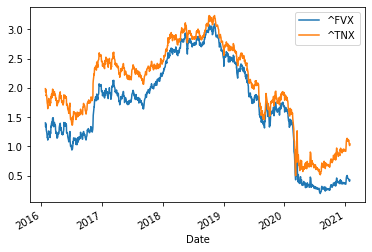

In [16]:
ty.plot()

the yield curve between 5 year and 10 years TB are almost identical in 2019.

# Ticker Object

In [17]:
ticker = "DIS"
dis = yf.Ticker(ticker)

In [18]:
dis.history(period='5y') # adjust close is auto adjusted

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-28,89.82,89.82,87.15,88.24,7312700,0.0,0
2016-01-29,88.88,90.40,88.33,90.40,8211600,0.0,0
2016-02-01,89.70,90.30,89.34,89.77,7027200,0.0,0
2016-02-02,88.68,88.84,87.62,87.85,7244400,0.0,0
2016-02-03,88.78,90.01,87.19,89.76,10878000,0.0,0
...,...,...,...,...,...,...,...
2021-01-22,174.00,175.25,171.89,172.78,9517200,0.0,0
2021-01-25,171.89,173.11,168.77,171.89,7833700,0.0,0
2021-01-26,173.00,173.35,169.05,169.56,7523200,0.0,0


# Fundamentals Data
- Balance Sheet, Profit & Loss and Cashflow Statement Data 
- Forward P/E
- Average Volume



In [19]:
!pip install yfinance==0.1.52
# pip install yfinance==0.1.52 -> with this you should be able to get Balance Sheet, P&L and Cashflow Statement Data

In [23]:
dis.quarterly_balance_sheet

,2020-10-03,2020-06-27,2020-03-28,2019-12-28
Intangible Assets,1.917300e+10,1.958900e+10,2.203700e+10,2.266900e+10
Total Liab,1.040370e+11,1.080240e+11,1.023210e+11,9.714600e+10
Total Stockholder Equity,8.358300e+10,8.586600e+10,9.040700e+10,8.975700e+10
Minority Interest,1.392900e+10,1.375900e+10,1.356600e+10,1.404500e+10
Other Current Liab,4.545000e+09,3.707000e+09,4.891000e+09,5.024000e+09
Total Assets,2.015490e+11,2.076490e+11,2.062940e+11,2.009480e+11
Common Stock,5.449700e+10,5.438600e+10,5.423000e+10,5.399500e+10
Other Current Assets,8.750000e+08,8.990000e+08,1.003000e+09,9.380000e+08
Retained Earnings,3.831500e+10,3.900400e+10,4.372100e+10,4.320200e+10
Other Liab,2.158100e+10,1.986000e+10,2.082700e+10,2.127000e+10


In [21]:
dis.cashflow

,2020-10-03,2019-09-28,2018-09-29,2017-09-30
Change To Liabilities,-2.293000e+09,1.910000e+08,2.350000e+08,-3.680000e+08
Total Cashflows From Investing Activities,-3.637000e+09,-4.118000e+09,-5.336000e+09,-4.111000e+09
Net Borrowings,1.123300e+10,3.677000e+09,-2.583000e+09,3.703000e+09
Total Cash From Financing Activities,8.480000e+09,-1.090000e+09,-8.843000e+09,-8.959000e+09
Change To Operating Activities,-1.570000e+08,9.320000e+08,-9.270000e+08,-5.200000e+07
Issuance Of Stock,3.050000e+08,3.180000e+08,2.100000e+08,2.760000e+08
Net Income,-2.864000e+09,1.105400e+10,1.259800e+10,8.980000e+09
Change In Cash,1.249900e+10,1.300000e+09,9.100000e+07,-6.960000e+08
Effect Of Exchange Rate,3.800000e+07,-9.800000e+07,-2.500000e+07,3.100000e+07
Total Cash From Operating Activities,7.618000e+09,6.606000e+09,1.429500e+10,1.234300e+10


In [26]:
pd.DataFrame(pd.Series(dis.info)).T

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,...,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url
0,91521,Communication Services,203000,"The Walt Disney Company, together with its sub...",Burbank,818-560-1000,CA,United States,[],http://www.thewaltdisneycompany.com,1,500 South Buena Vista Street,Entertainment,163.03,166.17,140.166,0.00539778,None,None,169.36,None,9880514,None,163.03,173.26,0.88,166.17,None,9880514,None,None,None,None,1576195200,1.19958,None,None,166.09,2,USD,...,4.78,None,1814259968,None,None,46.178,20863165,0.0115,None,1601683200,0.65574,-2832000000,-1.588,0.88,0.142253,3.65607,0.00203,1664755200,1601683200,1.47,1606694400,1807968463,365323845632,None,1181692800,10000:9865,None,1576195200,None,None,1609372800,2.54,None,0.0115,20089272,None,None,None,166.17,https://logo.clearbit.com/thewaltdisneycompany...


In [94]:
df = pd.Series(dis.info, name="DIS").to_frame().T
ticker = ['MSFT','FB']
for i in ticker:
  df.loc[i] = pd.Series(yf.Ticker(i).info)

In [95]:
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,...,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url
DIS,91521,Communication Services,203000,"The Walt Disney Company, together with its sub...",Burbank,818-560-1000,CA,United States,[],http://www.thewaltdisneycompany.com,1,500 South Buena Vista Street,Entertainment,169.56,165.01,139.999,0.0051899,None,None,166.34,None,8490316,None,169.56,172.978,0.88,165.01,None,8490316,None,None,None,NaN,1576195200,1.19958,None,None,160.52,2,USD,...,4.78,None,1814259968,None,None,46.178,20863165,0.0115,None,1601683200,0.65574,-2832000000,-1.588,0.88,0.176031,3.53047,0.00203,1664755200,1601683200,1.47,1606694400,1807968463,365323845632,None,1181692800,10000:9865,None,1576195200,None,NaN,1609372800,2.54,None,0.0115,20089272,None,None,None,165.01,https://logo.clearbit.com/thewaltdisneycompany...
MSFT,98052-6399,Technology,163000,"Microsoft Corporation develops, licenses, and ...",Redmond,425-882-8080,WA,United States,[],http://www.microsoft.com,1,One Microsoft Way,Software—Infrastructure,232.33,238,213.48,0.00899582,0.329,None,240.44,None,35250366,None,232.33,219.226,2.09,238,None,35250366,None,None,None,2.24,1613520000,None,None,None,230.14,2,USD,...,7.97,None,7560500224,None,None,16.313,39201229,0.0052,None,1593475200,0.71844,51309998080,6.199,0.56,0.176031,14.277,0.00059,1656547200,1609372800,1.44,1606694400,7435677480,1690592215040,None,1045526400,2:1,None,1605657600,None,0.327,1609372800,1.91,None,0.0052,39002778,None,None,None,238,https://logo.clearbit.com/microsoft.com
FB,94025,Communication Services,56653,"Facebook, Inc. develops products that enable p...",Menlo Park,650-543-4800,CA,United States,[],http://investor.fb.com,1,1601 Willow Road,Internet Content & Information,282.05,282.53,267.128,None,0,None,283.45,None,22413616,None,282.05,269.533,None,282.53,None,22413616,None,None,None,None,None,1.18277,None,None,268.12,2,USD,...,13,None,2403970048,None,None,41.309,23421272,0.0082,None,1577750400,0.79766,25276000256,8.778,None,0.176031,6.58791,0.00632,1640908800,1601424000,1.42,1606694400,2392081634,758884925440,None,None,None,None,None,None,0.288,1609372800,1.53,None,0.0098,23506431,2848290048,None,None,282.53,https://logo.clearbit.com/investor.fb.com


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, DIS to FB
Columns: 122 entries, zip to logo_url
dtypes: float64(1), object(121)
memory usage: 3.0+ KB


# Options

In [114]:
calls = dis.option_chain()[0]
puts =  dis.option_chain()[1]

DIS210129C00090000: 
contract symbol = DIS
maturity date = 2021 01 29
C = Call option
90 = strike price

In [116]:
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,DIS210129C00090000,2021-01-21 20:50:01,90.0,81.60,72.30,73.9,0.0,0.0,5.0,9,3.281252,True,REGULAR,USD
1,DIS210129C00095000,2021-01-20 16:07:25,95.0,79.10,67.30,68.9,0.0,0.0,NaN,1,3.015627,True,REGULAR,USD
2,DIS210129C00100000,2021-01-20 20:59:32,100.0,73.70,62.30,63.9,0.0,0.0,1.0,13,2.750003,True,REGULAR,USD
3,DIS210129C00105000,2021-01-22 20:20:43,105.0,67.56,57.35,58.9,0.0,0.0,30.0,41,2.597660,True,REGULAR,USD
4,DIS210129C00110000,2021-01-25 18:47:11,110.0,60.83,52.35,53.9,0.0,0.0,6.0,6,2.351567,True,REGULAR,USD


# Streaming real-time Data

In [117]:
import time

In [118]:
yf.download("EURUSD=X", interval = '1m', period='1d').tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-01-28 05:13:00+00:00,1.210068,1.210068,1.210068,1.210068,1.210068,0
2021-01-28 05:14:00+00:00,1.209775,1.209775,1.209775,1.209775,1.209775,0
2021-01-28 05:15:00+00:00,1.209921,1.209921,1.209921,1.209921,1.209921,0
2021-01-28 05:16:00+00:00,1.209921,1.209921,1.209921,1.209921,1.209921,0
2021-01-28 05:17:44+00:00,1.209775,1.209775,1.209775,1.209775,1.209775,0


In [120]:
data = yf.download("EURUSD=X", interval = '1m', period='1d').tail()
print (data.index[-1] # index
       , data.iloc[-1,3] # close price
       )

[*********************100%***********************]  1 of 1 completed
2021-01-28 05:18:44+00:00 1.2097749710083008


In [122]:
while True:
  time.sleep(60)
  data = yf.download("EURUSD=X", interval = '1m', period='1d').tail()
  print (data.index[-1], data.iloc[-1,3])

[*********************100%***********************]  1 of 1 completed
2021-01-28 05:21:44+00:00 1.209628701210022
[*********************100%***********************]  1 of 1 completed
2021-01-28 05:22:44+00:00 1.2097749710083008
[*********************100%***********************]  1 of 1 completed
2021-01-28 05:23:44+00:00 1.2097749710083008


KeyboardInterrupt: ignored

In [ ]:
!conda install ujson
!pip install v20
!pip install --index-url https://test.pypi.org/simple/ tpqoa